# Implementação de uma Rede Neural Convolucional(CNN) para classificação de bananas 

Alunos: Ana Carolina da Silva, Gustavo Baroni Bruder, Luiz Gustavo Klitzke, Rodrigo Kapulka Franco, Nicole Bauchspiess

In [2]:
import os

import cv2 as cv
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tensorflow import keras

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import pickle

import tensorflow.python.util.deprecation as deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

## Carregar o <i>dataset</i> a partir da estrutura de pastas

In [3]:
nomes_classes = ["rotten", "healthy"]

def load_data_path(path, class_type, x, y):
    for img_path in os.listdir(path):
        img = cv.imread(f'{path}/{img_path}', cv.IMREAD_GRAYSCALE)
        x.append(cv.resize(img, (224, 224)) / 255.0)
        y.append(class_type)

def load_dataset():
    x_train = []
    y_train = []
    x_test = []
    y_test = []

    load_data_path("data/train/Banana__Healthy", 1, x_train, y_train)
    load_data_path("data/train/Banana__Rotten", 0, x_train, y_train)
    load_data_path("data/test/Banana__Healthy", 1, x_test, y_test)
    load_data_path("data/test/Banana__Rotten", 0, x_test, y_test)

    return np.array(x_train), np.array(y_train), np.array(x_test), np.array(y_test)

x_train, y_train, x_test, y_test = load_dataset()

## Normalização dos dados

In [4]:
X_train_new = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
X_test_new = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

## Configurar a CNN

In [5]:
cnn = keras.models.Sequential([
        keras.layers.InputLayer(shape=(224, 224, 1)),

        keras.layers.Conv2D(64, 5, activation='relu', padding='same', kernel_initializer='glorot_uniform'),
        keras.layers.MaxPool2D(2),

        keras.layers.Conv2D(128, 3, activation='relu', padding='same'),

        keras.layers.Conv2D(128, 3, activation='relu', padding='same'),

        keras.layers.MaxPool2D(2),

        keras.layers.Conv2D(258, 3, activation='relu', padding='same'),

        keras.layers.Conv2D(258, 3, activation='relu', padding='same'),
        keras.layers.MaxPool2D(2),

        keras.layers.Flatten(),

        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dropout(rate=0.5),

        keras.layers.Dense(64, activation="relu"),
        keras.layers.Dropout(rate=0.5),
        
        keras.layers.Dense(2, activation="softmax")])

cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 64)   │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 56, 56, 258)    │       297,474 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 56, 56, 258)    │       599,334 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 258)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 202272)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    25,890,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,019,242 (103.07 MB)

 Trainable params: 27,019,242 (103.07 MB)

 Non-trainable params: 0 (0.00 B)

## Treinar a rede

In [6]:
cnn.compile(loss="sparse_categorical_crossentropy",
               optimizer="sgd",
               metrics=["accuracy"])
history_nn = cnn.fit(X_train_new, y_train, epochs=20, validation_data=(X_test_new, y_test))

Epoch 1/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 295s 2s/step - accuracy: 0.6107 - loss: 0.6654 - val_accuracy: 0.7056 - val_loss: 0.6025
Epoch 2/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 296s 2s/step - accuracy: 0.7124 - loss: 0.5257 - val_accuracy: 0.8333 - val_loss: 0.4256
Epoch 3/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 294s 2s/step - accuracy: 0.7853 - loss: 0.4472 - val_accuracy: 0.8667 - val_loss: 0.3747
Epoch 4/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 294s 2s/step - accuracy: 0.8353 - loss: 0.3847 - val_accuracy: 0.8861 - val_loss: 0.3421
Epoch 5/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 295s 2s/step - accuracy: 0.8686 - loss: 0.3275 - val_accuracy: 0.8556 - val_loss: 0.3281
Epoch 6/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 297s 2s/step - accuracy: 0.8879 - loss: 0.3052 - val_accuracy: 0.8917 - val_loss: 0.3056
Epoch 7/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 299s 2s/step - accuracy: 0.8980 - loss: 0.2707 - val_accuracy: 0.8417 - val_loss: 0.3892
Epoch 8/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 295s 2s/step - accuracy: 0.9014 - loss: 0.2585 - val_accu

## Salvar e/ou carregar dados de treinamento para uso posterior

In [8]:
cnn.save("resultados/cnn.keras")

with open("resultados/history_cnn.pkl", "wb") as file:
    pickle.dump(history_nn, file)

In [9]:
cnn = keras.models.load_model("resultados/cnn.keras")

with open("resultados/history_cnn.pkl", "rb") as file:
    history_nn = pickle.load(file)

## Avaliar os resultados do treinamento

In [10]:
cnn.evaluate(X_test_new, y_test, verbose = 1)

12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 498ms/step - accuracy: 0.9167 - loss: 0.2240


[0.16430425643920898, 0.9388889074325562]

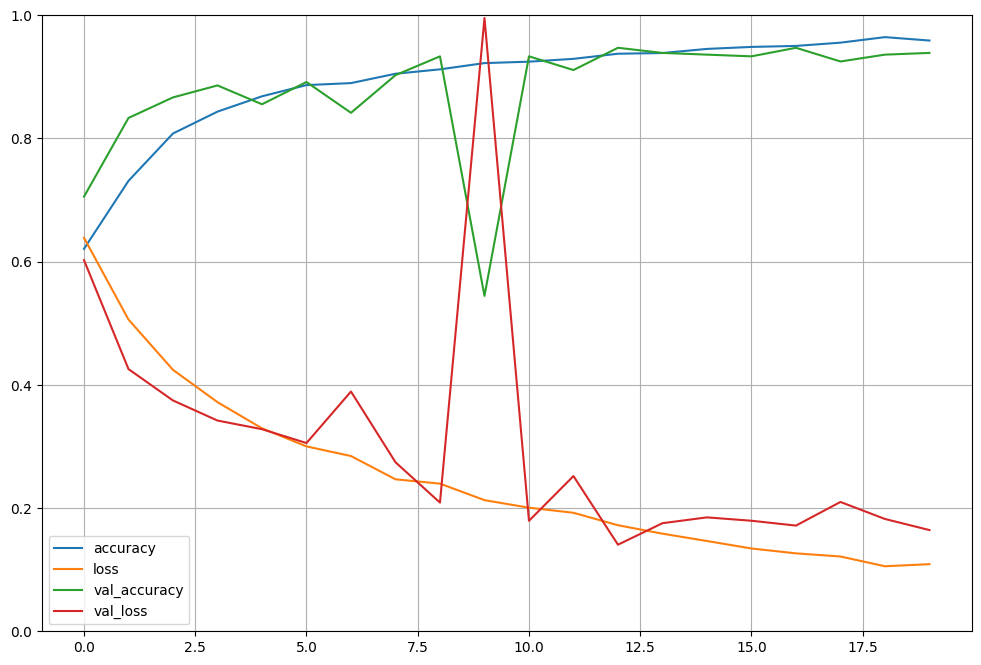

In [11]:
pd.DataFrame(history_nn.history).plot(figsize=(12, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### Matrizes de confusão de algumas partes do dataset

In [12]:
def monta_matriz_confusao(labels_reais, labels_estimadas, titulo):
    cm = confusion_matrix(labels_reais, labels_estimadas)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = nomes_classes)

    # Plotar a matriz de confusão
    plt.figure(figsize = (8, 8))
    disp.plot(cmap = plt.cm.Blues)
    plt.title(titulo)
    plt.ylabel("Classe real")
    plt.xlabel("Classe estimada")
    plt.xticks(rotation =  45)

12/12 - 6s - 500ms/step


<Figure size 800x800 with 0 Axes>

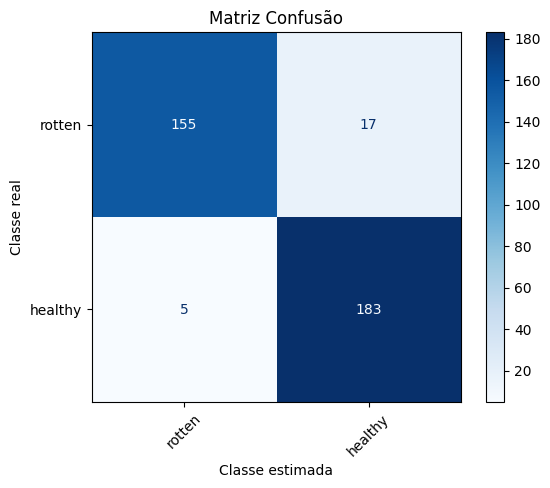

In [13]:
rotulos_esperados = y_test

resultados = cnn.predict(x_test, verbose = 2)
rotulos_obtidos = []

for i in range (len(resultados)):
    rotulos_obtidos.append(np.argmax(resultados[i], axis = -1))

monta_matriz_confusao(rotulos_obtidos, rotulos_esperados, "Matriz Confusão")